In [5]:
import mitsuba as mi
import drjit as dr

import os
import numpy as np
import matplotlib.pyplot as plt
import time
print(mi.variants())

['scalar_rgb', 'scalar_spectral', 'cuda_ad_rgb', 'llvm_ad_rgb']


In [6]:
mi.set_variant('cuda_ad_rgb')

In [8]:
simple_box = mi.cornell_box()

simple_box['integrator'] = {
    'type': 'direct',
    'emitter_samples': 10,
    'bsdf_samples': 10
}

scene_default = mi.load_dict(simple_box)

In [9]:
start = time.perf_counter()
img_default = mi.render(scene_default, spp=10)
elapsed_default = time.perf_counter() - start
print(elapsed_default)

7.0412502000000075


In [10]:
from custom_direct_new import RISIntegrator

mi.register_integrator("custom_direct", lambda props: RISIntegrator(props))
simple_box = mi.cornell_box()

simple_box['integrator'] = {
    'type': 'custom_direct',
    'emitter_samples': 10,
    'bsdf_samples': 10
}

scene_ris = mi.load_dict(simple_box)

In [11]:
start = time.perf_counter()
img_ris = mi.render(scene_ris, spp=10)
elapsed_ris = time.perf_counter() - start
print(elapsed_ris)

5.390310999999997


In [12]:
from custom_direct import NeIntegrator

mi.register_integrator("ne_direct", lambda props: NeIntegrator(props))
simple_box = mi.cornell_box()

simple_box['integrator'] = {
    'type': 'ne_direct',
    'emitter_samples': 10,
    'bsdf_samples': 10
}

scene_ne = mi.load_dict(simple_box)

In [13]:
start = time.perf_counter()
img_ne = mi.render(scene_ne, spp=10)
elapsed_ne = time.perf_counter() - start
print(elapsed_ne)

0.4391266000000087


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


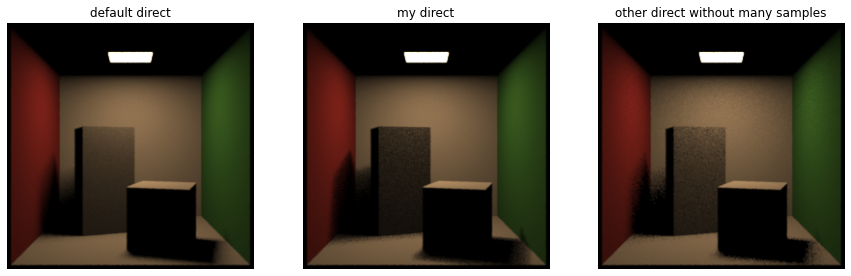

In [16]:
fig, axs = plt.subplots(figsize=(15, 5), ncols=3, nrows=1)

axs[0].imshow(img_default** (1. / 2.2))
axs[0].set_title('default direct')
axs[1].imshow(img_ris** (1. / 2.2))
axs[1].set_title('my direct')
axs[2].imshow(img_ne** (1. / 2.2))
axs[2].set_title('other direct without many samples')
for ax in axs:
    ax.axis('off')
plt.show()

In [4]:
from custom_pt import Simple

mi.register_integrator("integrator", lambda props: Simple(props))

64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


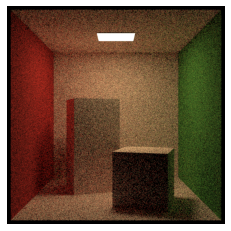

In [8]:
scene = mi.cornell_box()
scene['integrator']['type'] = 'integrator'
scene['integrator']['max_depth'] = 16
scene['integrator']['rr_depth'] = 2
scene['sensor']['sampler']['sample_count'] = 64
scene['sensor']['film']['width'] = 1024
scene['sensor']['film']['height'] = 1024
scene = mi.load_dict(scene)

img = mi.render(scene)

plt.imshow(img ** (1. / 2.2))
plt.axis("off")
plt.show()

In [3]:
from custom_mis import MyPathIntegrator
mi.register_integrator("mypath", lambda props: MyPathIntegrator(props))

# Load Cornell box scene & update integrator to custom one
cbox = mi.cornell_box()
cbox['integrator']['type'] = "mypath"

In [7]:
# Render
scene = mi.load_dict(cbox)
img = mi.render(scene, spp=1000)
mi.Bitmap(img)

Bitmap[
  pixel_format = rgb,
  component_format = float32,
  size = [256, 256],
  srgb_gamma = 0,
  struct = Struct<12>[
    float32 R; // @0, premultiplied alpha
    float32 G; // @4, premultiplied alpha
    float32 B; // @8, premultiplied alpha
  ],
  data = [ 768 KiB of image data ]
]

In [ ]:
root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
scene_path = os.path.join(root, 'scenes/veach-mis/scene_play.xml')
veach_mis = mi.load_file(scene_path)

veach_img = mi.render(veach_mis)
mi.Bitmap(veach_img).write('veach_direct_both_custom_50.exr')